Association of life expectancy with other explanatory variables for different countries from the GapMinder dataset
------------------------------------------------------------------------------------------------------------------------

A *correlation analysis* was conducted on the *GapMinder* dataset to understand the association of 14 explanatory variables (including income per person, alcohol consumption, armed forces rate, breast cancer per 100th, co2 emissions, female employment rate, hiv rate, internet use rate, oil per person, polity score, relectric per person, suicide per 100th, employment rate, urbanization rate) with the variable *life expectancy*.

After removing the obeservations with missing values the pearson correlation coefficient is computed. As can be seen from the below results, the variable *internetuserate* has a very strong positive (perfect) correlation with the variable *life expectancy*. The variable *hivrate* is the variable most negatively associated with the variable *life expectancy*. The variable *armedforcesrate* has the least corrleation with *life expectancy*. Also, the corrsponding *p-values* (with the null hypothesis that the variables are not corrlelated) are reported. All the variables *except armedforcesrate and co2emissions* have statistically significant correlations at 5% level. 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
''')

In [1]:
import pandas
import numpy as np
import seaborn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

data = pandas.read_csv('C:\\courses\\Coursera\\Current\\Data Analysis Tools\\Week3\\gapminder.csv')
data_clean = data.drop('country', 1)
data_clean = data_clean.convert_objects(convert_numeric=True) #.dtypes
data_clean=data_clean.replace(' ', np.nan)
data_clean = data_clean.dropna()

xvars = ['incomeperperson','alcconsumption','armedforcesrate', \
                     'breastcancerper100th','co2emissions','femaleemployrate','hivrate',  \
                     'internetuserate','oilperperson','polityscore','relectricperperson', \
                     'suicideper100th','employrate','urbanrate']

data_clean.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,12982.654643,9.429107,1.264465,50.233929,1.676553e+10,47.044643,0.572321,52.464245,75.497446,1.277555,6.142857,1461.149633,11.076095,57.491072,68.072143
std,12712.681024,5.266750,1.072482,24.990276,4.687420e+10,10.781329,2.358642,26.218205,5.787174,1.709368,5.940397,1470.378386,6.984522,7.559035,16.572755
min,558.062877,0.050000,0.287892,16.600000,2.262553e+08,18.200001,0.060000,3.700003,52.797000,0.032281,-10.000000,68.115229,1.380965,41.099998,27.140000
25%,2532.598585,6.417500,0.525650,30.675000,1.859310e+09,41.999999,0.100000,33.049632,73.091750,0.441491,5.000000,494.648726,5.983114,52.175000,60.935000
50%,6219.692968,10.035000,0.964324,46.100000,3.852409e+09,48.299999,0.150000,48.980090,75.766500,0.835665,9.000000,875.419623,9.993177,58.150002,68.570000
75%,25373.478550,13.135000,1.625027,74.500000,1.135942e+10,54.374999,0.400000,77.533598,80.578250,1.570551,10.000000,1896.710910,13.750678,62.325000,78.210000
max,39972.352768,19.150000,6.394936,101.100000,3.342209e+11,68.900002,17.800000,93.277508,83.394000,12.228645,10.000000,7432.130852,33.341860,76.000000,100.000000


In [2]:
#df = pandas.DataFrame(np.zeros(0,dtype=[
#('r', 'f8'),
#('p', 'f8')]))
df = pandas.DataFrame(data=np.array(scipy.stats.pearsonr(data_clean[xvars[0]], data_clean['lifeexpectancy']))).T #, columns=['r','p'])
for xvar in xvars[1:]:
    df = df.append(pandas.DataFrame(data=np.array(scipy.stats.pearsonr(data_clean[xvar], data_clean['lifeexpectancy']))).T)
df.columns = ['pearson-r', 'p-value']
df.insert(0, 'variables', xvars)
df = df.sort(['pearson-r'], ascending=[1])
print(df)

              variables  pearson-r       p-value
0               hivrate  -0.542506  1.566318e-05
0       suicideper100th  -0.218335  1.059663e-01
0       armedforcesrate   0.023648  8.626540e-01
0          co2emissions   0.103990  4.456349e-01
0            employrate   0.210334  1.197189e-01
0        alcconsumption   0.218541  1.056298e-01
0      femaleemployrate   0.268129  4.571763e-02
0           polityscore   0.344843  9.248381e-03
0          oilperperson   0.422911  1.165352e-03
0    relectricperperson   0.551581  1.052532e-05
0             urbanrate   0.552084  1.029253e-05
0  breastcancerper100th   0.580247  2.769328e-06
0       incomeperperson   0.732452  1.400123e-10
0       internetuserate   0.769160  4.381504e-12


<class 'pandas.core.frame.DataFrame'>


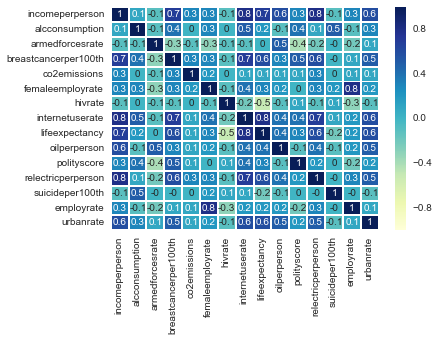

In [19]:
cor_df = pandas.DataFrame(data_clean.corr(method='pearson'))
#print(cor_df)
print(type(cor_df))
ax = seaborn.heatmap(cor_df.apply(np.round, args=(1,)), annot=True, linewidths=.5, cmap="YlGnBu")

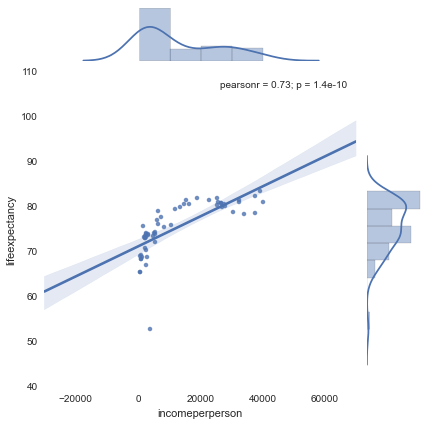

In [26]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,6))
#seaborn.regplot(x=xvars[0], y="lifeexpectancy", fit_reg=True, data=data_clean, ax=ax1)
#seaborn.regplot(x=xvars[1], y="lifeexpectancy", fit_reg=True, data=data_clean, ax=ax2)
seaborn.jointplot(x=xvars[0], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

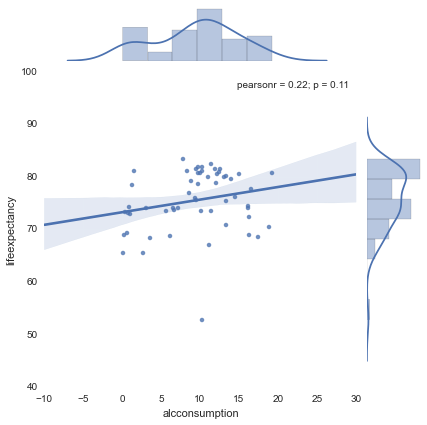

In [97]:
seaborn.jointplot(x=xvars[1], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

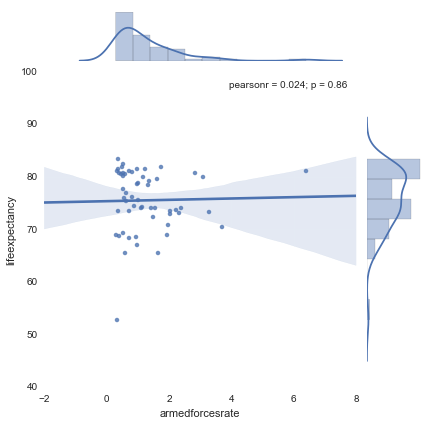

In [75]:
seaborn.jointplot(x=xvars[2], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

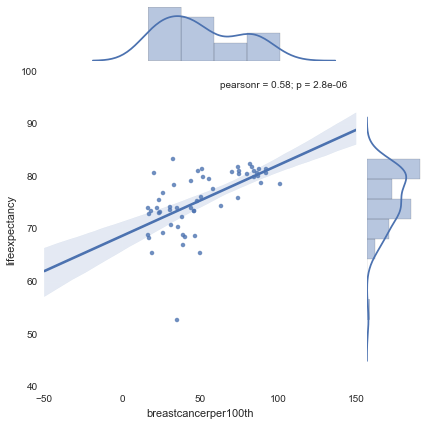

In [76]:
seaborn.jointplot(x=xvars[3], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

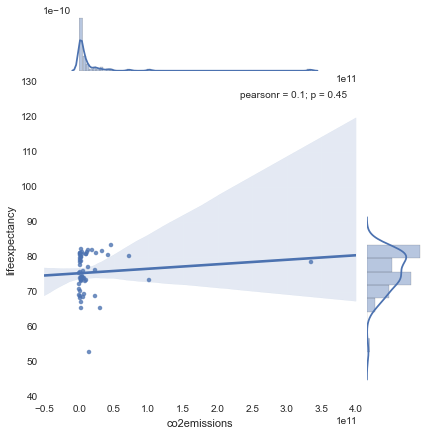

In [77]:
seaborn.jointplot(x=xvars[4], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

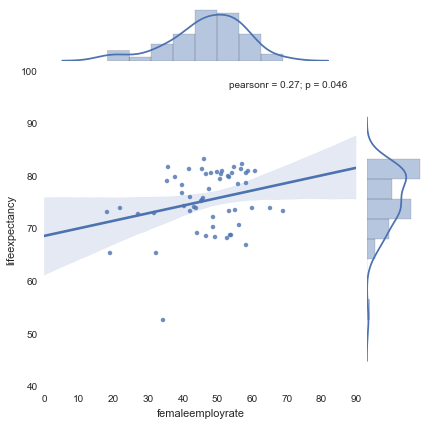

In [78]:
seaborn.jointplot(x=xvars[5], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

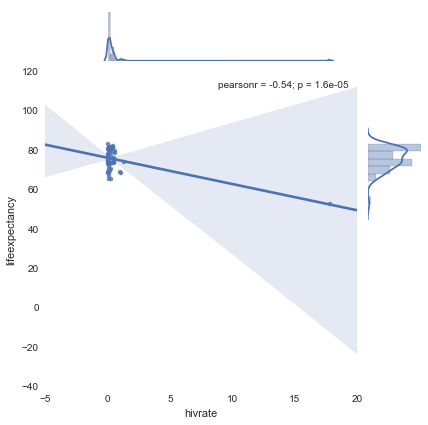

In [79]:
seaborn.jointplot(x=xvars[6], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

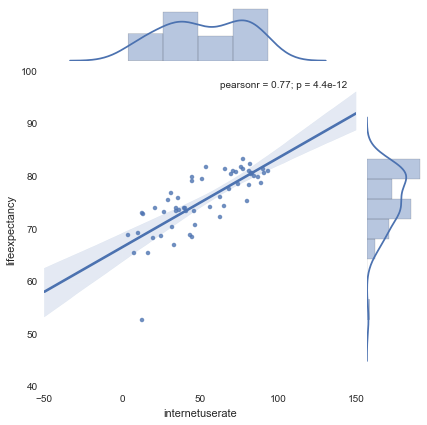

In [80]:
seaborn.jointplot(x=xvars[7], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

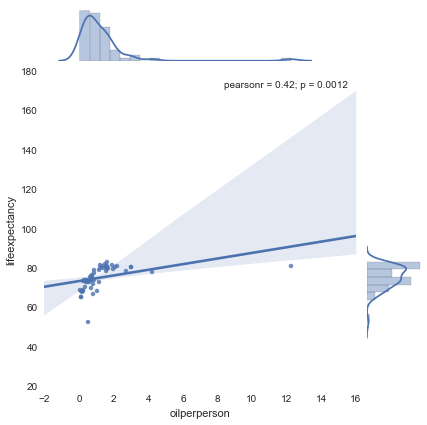

In [81]:
seaborn.jointplot(x=xvars[8], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

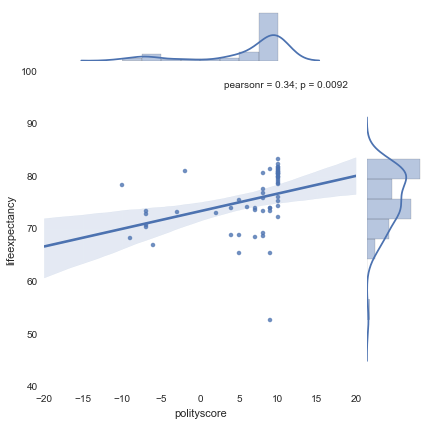

In [82]:
seaborn.jointplot(x=xvars[9], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

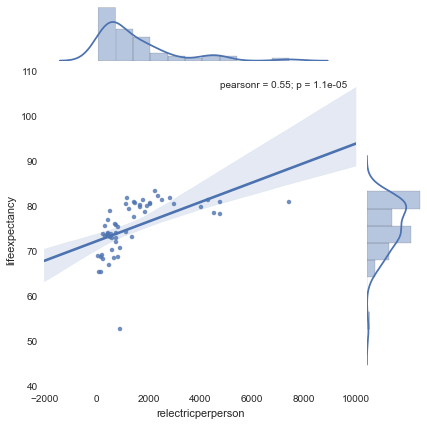

In [83]:
seaborn.jointplot(x=xvars[10], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

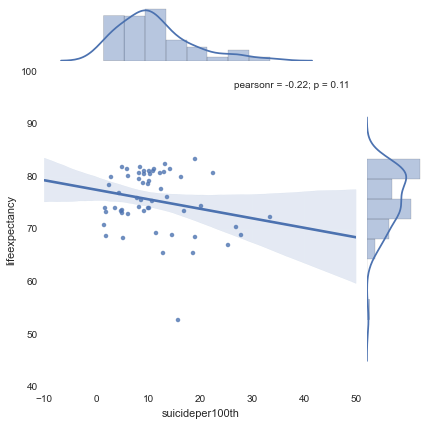

In [84]:
seaborn.jointplot(x=xvars[11], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

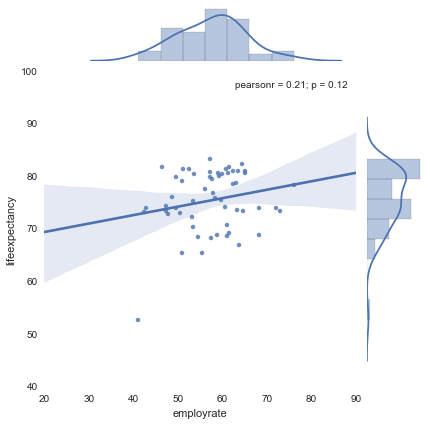

In [85]:
seaborn.jointplot(x=xvars[12], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

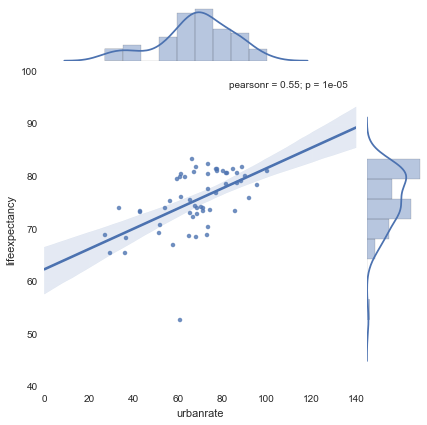

In [86]:
seaborn.jointplot(x=xvars[13], y="lifeexpectancy", data=data_clean, kind="reg", stat_func=scipy.stats.pearsonr)

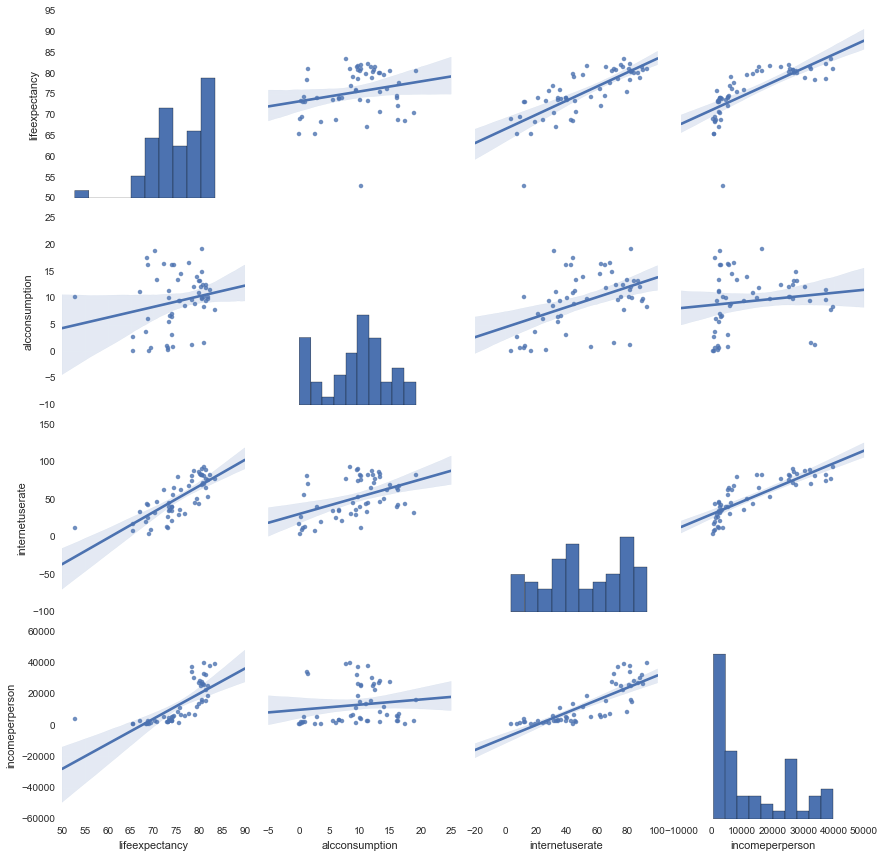

In [89]:
seaborn.pairplot(data_clean, vars=["lifeexpectancy", "alcconsumption", "internetuserate", "incomeperperson"], kind="reg")

         variables  pearson-r   p-value
0          hivrate  -0.226524  0.093188
0  armedforcesrate  -0.116446  0.392741
0  suicideper100th   0.072865  0.593559
0     co2emissions   0.143092  0.292763
0       employrate   0.190514  0.159594


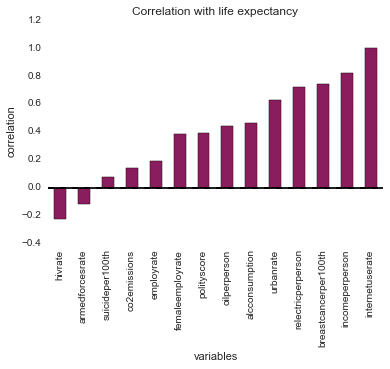

In [23]:
#seaborn.lmplot(x="incomeperperson", y="lifeexpectancy", hue="internetuserate", data=data_clean, markers=["o", "x"], palette="Set1");
plt.figure();
#print(df.head())
df['pearson-r'].plot(kind='bar'); 
plt.axhline(0, color='k')
ax = df['pearson-r'].plot(kind='bar', colormap="Spectral", stacked=False, title="Correlations with life expectancy", alpha=0.75, rot=90)
ax.set_xlabel("variables")
ax.set_ylabel("correlation")
ax.set_xticks(range(0, len(xvars)), minor=False)
ax.set_xticklabels(df.variables.tolist(), rotation=90, minor=False)
#ax.legend(['pos', 'neg'], loc='upper right')
plt.show()

         variables  pearson-r   p-value
0          hivrate  -0.542506  0.000016
0  suicideper100th  -0.218335  0.105966
0  armedforcesrate   0.023648  0.862654
0     co2emissions   0.103990  0.445635
0       employrate   0.210334  0.119719


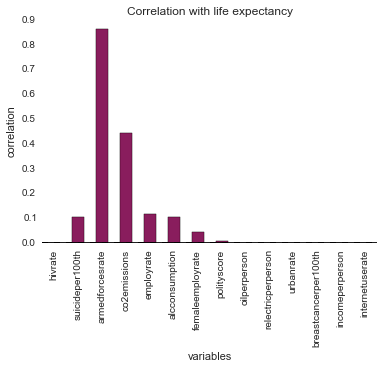

In [28]:
plt.figure();
#print(df.head())
df['p-value'].plot(kind='bar'); 
plt.axhline(0, color='k')
ax = df['p-value'].plot(kind='bar', colormap="Spectral", stacked=False, title="Statistically Significant Correlations with life expectancy", alpha=0.75, rot=90)
ax.set_xlabel("variables")
ax.set_ylabel("correlation")
ax.set_xticks(range(0, len(xvars)), minor=False)
ax.set_xticklabels(df.variables.tolist(), rotation=90, minor=False)
#ax.legend(['pos', 'neg'], loc='upper right')
plt.show()